In [1]:
import numpy as np
import sklearn
import sklearn.datasets
import matplotlib.pyplot as plt

np.random.seed(1)

# 1 - Create Planar data

### Helper Functions

In [2]:
def load_planar_dataset():
    # Setting seed for reproduce ability
    np.random.seed(1)
    # Number of examples
    m = 400
    # Number of points per class
    N = int(m/2)
    # Dimensionality
    D = 2
    # Data matrix where each row is a single example
    X = np.zeros((m, D))
    # labels vector (0 for red, 1 for blue)
    Y = np.zeros((m, 1), dtype='uint8')
    # Maximum ray of the flower
    a = 4
    
    for j in range(2):
        ix = range(N*j, N*(j+1))
        # theta
        t = np.linspace(j*3.12, (j+1)*3.12, N) + np.random.randn(N) * .2
        # radius
        r = a * np.sin(4*t) + np.random.randn(N) * .2
        X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
        Y[ix] = j
    
    X = X.T
    Y = Y.T
    
    return X, Y

def plot_decision_boundary(model, X, y):
    # Set min and max values and give it some padding
    x_min, x_max = X[0, :].min() - 1, X[0, :].max() + 1
    y_min, y_max = X[1, :].min() - 1, X[1, :].max() + 1
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole grid
    Z = model(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.ylabel('x2')
    plt.xlabel('x1')
    plt.scatter(X[0, :], X[1, :], c=y, cmap=plt.cm.Spectral)

In [3]:
X, Y = load_planar_dataset()

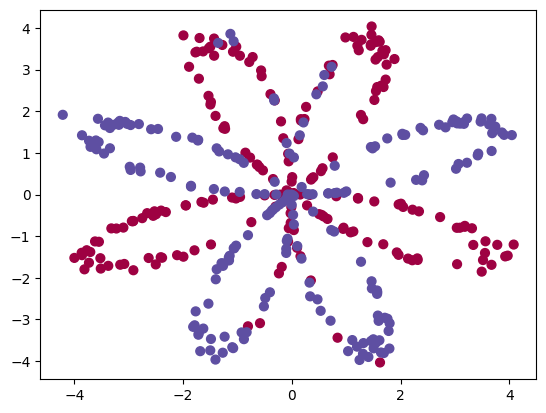

In [4]:
# Visualize the data:
plt.scatter(X[0, :], X[1, :], c=Y, s=40, cmap=plt.cm.Spectral);

# 2 - Define the Neural Network Structure

### Define the layer sizes for the neural network

In [5]:
def layer_sizes(X, Y):
    """
    Function to create structure layers for the neural network.
    
    Arguments:
    X -- input dataset of shape (input size, number of examples)
    Y -- labels of shape (output size, number of examples)
    
    Returns:
    n_x -- the size of the input layer 
    n_h -- the size of the hidden layer 
    n_y -- the size of the output layer 
    """
    n_x = X.shape[0]
    n_h = 4
    n_y = Y.shape[0]
    
    return n_x, n_h, n_y

In [7]:
# Checking layer_sizes function
# Please don't change this cell
np.random.seed(1)
(n_x, n_h, n_y) = layer_sizes(np.random.randn(5, 3), np.random.randn(2, 3))

assert n_x == 5, "n_x should be 5"
assert n_h == 4, "n_h should be 5"
assert n_y == 2, "n_y should be 5"

print("PASSED!")

PASSED!


### Initialize the model's parameters

Initialize the weights matrices with random values, and bias vectors as zeros.

In [8]:
def initialize_parameters(n_x, n_h, n_y):
    """
    Function for initialize weights matrices with random values and bias vectors as zeros
    
    Argument:
    n_x -- size of the input layer
    n_h -- size of the hidden layer
    n_y -- size of the output layer
    
    Returns:
    params -- python dictionary containing your parameters:
                    w1 -- weight matrix of shape (n_h, n_x)
                    b1 -- bias vector of shape (n_h, 1)
                    w2 -- weight matrix of shape (n_y, n_h)
                    b2 -- bias vector of shape (n_y, 1)
    """
    
    # Setting numpy random seed for reproductive ability
    np.random.seed(2)
    
    # Setting the dimension of W1, b1, w2, and b2
    return dict(
        W1 = np.random.randn(n_h, n_x) * 0.01,
        b1 = np.zeros((n_h, 1)),
        W2 = np.random.randn(n_y, n_h) * 0.01,
        b2 = np.zeros((n_y, 1))
    )

In [9]:
# Checking initialize_parameters function
# Please don't change this cell
parameters = initialize_parameters(2, 4, 1)


W1 = np.array([[-0.00416758, -0.00056267],
               [-0.02136196,  0.01640271],
               [-0.01793436, -0.00841747],
               [ 0.00502881, -0.01245288]])
W2 = np.array( [[-0.01057952, 
                 -0.00909008, 
                 0.00551454,
                 0.02292208]])

assert np.array_equal(np.round(parameters["W1"], 8), W1), "There is a problem with W1"
assert np.array_equal(np.round(parameters["W2"], 8), W2), "There is a problem with W2"
assert np.sum(parameters["b1"]) == 0 and parameters["b1"].shape == (4, 1), "There is a problem with b1"
assert np.sum(parameters["b2"]) == 0 and parameters["b2"].shape == (1, 1), "There is a problem with b2"

print("PASSED!")

PASSED!


### Forward Propagation

Using the `np.tahn()` activation function for A[1] and sigmoid for output.

In [10]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [11]:
def forward_propagation(X, parameters):
    """
    Argument:
    X -- input data of size (n_x, m)
    parameters -- python dictionary containing your parameters (output of initialization function)
    
    Returns:
    A2 -- This sigmoid output of the second activation
    cache -- a dictionary containing "Z1", "A1", "Z2" and "A2"
    """
    
    # Retrieve each parameter from the dictionary "parameters"
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    # Implement Forward Propagation to calculate A2 (probabilities)
    Z1 = np.dot(W1, X) + b1
    A1 = np.tanh(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = sigmoid(Z2)
    
    # Values needed in the backprogation are stored in "cache".
    # This will be given as an input to the backpropagation.
    cache = {
        "Z1" : Z1,
        "A1" : A1,
        "Z2" : Z2,
        "A2" : A2
    }
    
    return A2, cache

In [12]:
# Check forward propogation function
# Please don't change this cell
np.random.seed(1)

X_assess = np.random.randn(2, 3)
b1 = np.random.randn(4,1)
b2 = np.array([[ -1.3]])

parameters = {'W1': np.array([[-0.00416758, -0.00056267],
    [-0.02136196,  0.01640271],
    [-0.01793436, -0.00841747],
    [ 0.00502881, -0.01245288]]),
    'W2': np.array([[-0.01057952, -0.00909008,  0.00551454,  0.02292208]]),
    'b1': b1,
    'b2': b2}

A2, cache = forward_propagation(X_assess, parameters)

# Note: we use the mean here just to make sure that your output matches ours. 
assert np.mean(cache['Z1']) == 0.26281864019752443, "Check Z1"
assert np.mean(cache['A1']) == 0.09199904522700113, "Check A1"
assert np.mean(cache['Z2']) == -1.3076660128732143, "Check Z2"
assert np.mean(cache['A2']) == 0.21287768171914198, "Check A2"

print("PASSED!")

PASSED!


### Compute Cost

You can compute the cost function as follows:

$\Large J = -\frac{1}{m} \sum^{m}_{i=1} (y^{i} \log{(a^{[2](i)})} + (1 - y^{i}) \log{(1 - a^{[2](i)})})$

In [13]:
def compute_cost(A2, Y, parameters):
    """
    Computes the cross-entropy cost given in equation
    
    Arguments:
    A2 -- The sigmoid output of the second activation, of shape (1, number of examples)
    Y -- "true" labels vector of shape (1, number of examples)
    parameters -- python dictionary containing your parameters W1, b1, W2 and b2
    
    Returns: 
    cost -- cross-entropy cost given equation
    """
    
    # Number of example
    m = Y.shape[1]
    
    # Compute the cross-entropy cost
    logprobs = np.multiply(Y, np.log(A2)) + np.multiply((1 - Y), np.log(1 - A2))
    cost = -(1 / m) * np.sum(logprobs)
    
    # Makes sure cost is the dimension we expected.
    cost = np.squeeze(cost).astype(float)
    
    return cost

In [14]:
# Checking the cost function
# Please don't change this cell
np.random.seed(1)
Y_assess = (np.random.randn(1, 3) > 0)
parameters = {'W1': np.array([[-0.00416758, -0.00056267],
    [-0.02136196,  0.01640271],
    [-0.01793436, -0.00841747],
    [ 0.00502881, -0.01245288]]),
    'W2': np.array([[-0.01057952, -0.00909008,  0.00551454,  0.02292208]]),
    'b1': np.array([[ 0.],
    [ 0.],
    [ 0.],
    [ 0.]]),
    'b2': np.array([[ 0.]])}
A2 = (np.array([[ 0.5002307 ,  0.49985831,  0.50023963]]))

cost = compute_cost(A2, Y_assess, parameters)
assert np.round(cost, 8) == 0.69305876, "Check cost function"

print("PASSED!")

PASSED!


### Backward Propogation

Summary of gradient descent:

Equation |  Psudo Code  
--- | --- 
$dz^{[2]} = a^{[2]} - y$ | $dZ^{[2]} = A^{[2]} - Y$ 
$dW^{[2]} = dz^{[2]}a^{[2]}$ | $dW^{[2]} = \frac{1}{m}dZ^{[2]}A^{[1]T}$ 
$db^{[2]} = dz^{[2]}$ | $db^{[2]} = \frac{1}{m} np.sum(dZ^{[2]}, axis=1, keepdims=True)$
$dz^{[1]} = W^{[2]T}dz^{[2]} * g^{[1]'}(z^{[1]})$ | $dZ^{[1]} = W^{[2]T}dZ^{[2]} * g^{[1]'}(Z^{[1]})$
$dW^{[1]} = dz^{[1]}x^{T}$ | $dW^{[1]} = \frac{1}{m} dZ^{[1]}X^{T}$
$db^{[1]} = dz^{[1]}$ | $db^{[1]} = \frac{1}{m} np.sum(dZ^{[1]}, axis=1, keepdims=True)$

In [15]:
def backward_propagation(parameters, cache, X, Y):
    """
    Implement the backward propagation using the instructions above.
    
    Arguments:
    parameters -- python dictionary containing our parameters
    cache -- a dictionary containing "Z1", "A1", "Z2" and "A2"
    X -- input data of shape (2, number of examples)
    Y -- "true" labels vector of shape (1, number of examples)
    
    Returns:
    grads -- python dictionary containing your gradients with respect to different parameters
    """
    
    # Number of samples
    m = X.shape[1]
    
    # First, retrieve W1 and W2 from the dictionary "parameters".
    W1 = parameters["W1"]
    W2 = parameters["W2"]
    b1 = parameters["b1"]
    b2 = parameters["b2"]
    
    # Retrieve A1 and A2 from dictionary "cache"
    A1 = cache["A1"]
    A2 = cache["A2"]
    Z1 = cache["Z1"]
    Z2 = cache["Z2"]
    
    # Backward propagation: calculate dW1, db1, dW2, and db2
    dZ2 = A2 - Y 
    dW2 = (1/m) * np.dot(dZ2, A1.T)
    db2 = (1/m) * (np.sum(dZ2, axis=1, keepdims=True))
    dZ1 = np.dot(W2.T, dZ2) * (1 - np.power(A1, 2))
    dW1 = (1/m) * (np.dot(dZ1, X.T))
    db1 = (1/m) * np.sum(dZ1, axis=1, keepdims=True)
    
    return {
        "dW1": dW1,
        "db1": db1,
        "dW2": dW2,
        "db2": db2
    }

In [16]:
# Checking backward_propagation function
# Please don't change this cell

np.random.seed(1)

# Input arguments
X_assess = np.random.randn(2, 3)
Y_assess = (np.random.randn(1, 3) > 0)
parameters = {'W1': np.array([[-0.00416758, -0.00056267],
                              [-0.02136196,  0.01640271],
                              [-0.01793436, -0.00841747],
                              [ 0.00502881, -0.01245288]]),
              'W2': np.array([[-0.01057952, -0.00909008,  0.00551454,  0.02292208]]),
              'b1': np.array([[ 0.], [ 0.], [ 0.], [ 0.]]),
              'b2': np.array([[ 0.]])}

cache = {'A1': np.array([[-0.00616578,  0.0020626 ,  0.00349619],
                         [-0.05225116,  0.02725659, -0.02646251],
                         [-0.02009721,  0.0036869 ,  0.02883756],
                         [ 0.02152675, -0.01385234,  0.02599885]]),
        'A2': np.array([[ 0.5002307 ,  0.49985831,  0.50023963]]),
        'Z1': np.array([[-0.00616586,  0.0020626 ,  0.0034962 ],
                        [-0.05229879,  0.02726335, -0.02646869],
                        [-0.02009991,  0.00368692,  0.02884556],
                        [ 0.02153007, -0.01385322,  0.02600471]]),
        'Z2': np.array([[ 0.00092281, -0.00056678,  0.00095853]])}

grads = backward_propagation(parameters, cache, X_assess, Y_assess)

# Results
dW1 = [[ 0.00301023, -0.00747267],
       [ 0.00257968, -0.00641288],
       [-0.00156892,  0.003893  ],
       [-0.00652037,  0.01618243]]
db1 = [[ 0.00176201], 
       [ 0.00150995],
       [-0.00091736],
       [-0.00381422]]
dW2 = [[ 0.00078841, 0.01765429, -0.00084166, -0.01022527]]
db2 = [[-0.16655712]]

assert np.array_equal(np.round(grads["dW1"], 8), dW1), "Check dW1"
assert np.array_equal(np.round(grads["db1"], 8), db1), "Check db1"
assert np.array_equal(np.round(grads["dW2"], 8), dW2), "Check dW2"
assert np.array_equal(np.round(grads["db2"], 8), db2), "Check db2"

print("PASSED!")

PASSED!


### Gradient Descent

In [17]:
def apply_learning_rate(param, grad, lr):
    return param - (lr * grad)

def update_parameters(parameters, grads, learning_rate):
    """
    Updates parameters using the gradient descent with learning_rate
    
    Arguments:
    parameters -- python dictionary containing your parameters
    grads -- python dictionary containing your parameters
    learning_rate -- rate of the gradient descent 
    
    Returns:
    parameters -- python dictionary containing your updated parameters
    """

    # Update each parameters with parameter - learning rate * gradient
       # Retrieve each parameter from "parameters"
    parameters["W1"] = apply_learning_rate(parameters["W1"], grads["dW1"], learning_rate)
    parameters["b1"] = apply_learning_rate(parameters["b1"], grads["db1"], learning_rate)
    parameters["W2"] = apply_learning_rate(parameters["W2"], grads["dW2"], learning_rate)
    parameters["b2"] = apply_learning_rate(parameters["b2"], grads["db2"], learning_rate)
    
    return parameters

In [18]:
# Check update_parameters function
# Please don't change this cell
parameters = {'W1': np.array([[-0.00615039,  0.0169021 ],
                              [-0.02311792,  0.03137121],
                              [-0.0169217 , -0.01752545],
                              [ 0.00935436, -0.05018221]]),
              'W2': np.array([[-0.0104319 , 
                               -0.04019007,  
                               0.01607211,  
                               0.04440255]]),
              'b1': np.array([[ -8.97523455e-07],
                              [  8.15562092e-06],
                              [  6.04810633e-07],
                              [ -2.54560700e-06]]),
              'b2': np.array([[  9.14954378e-05]])}

grads = {'dW1': np.array([[ 0.00023322, -0.00205423],
                          [ 0.00082222, -0.00700776],
                          [-0.00031831,  0.0028636 ],
                          [-0.00092857,  0.00809933]]),
         'dW2': np.array([[ -1.75740039e-05, 
                           3.70231337e-03, 
                           -1.25683095e-03, 
                           -2.55715317e-03]]),
         'db1': np.array([[  1.05570087e-07],
                          [ -3.81814487e-06],
                          [ -1.90155145e-07],
                          [  5.46467802e-07]]),
         'db2': np.array([[ -1.08923140e-05]])}

parameters = update_parameters(parameters, grads,1.2)

W1 = [[-0.00643025, 0.01936718],
      [-0.02410458, 0.03978052],
      [-0.01653973, -0.02096177],
      [ 0.01046864, -0.05990141]]
b1 = [[-1.02420756e-06],
      [ 1.27373948e-05],
      [ 8.32996807e-07],
      [-3.20136836e-06]]
W2 = [[-0.01041081, -0.04463285, 0.01758031, 0.04747113]]
b2 = [[0.00010457]]

assert np.array_equal(np.round(parameters["W1"], 8), np.round(W1, 8)), "Check W1"
assert np.array_equal(np.round(parameters["b1"], 8), np.round(b1, 8)), "Check b1"
assert np.array_equal(np.round(parameters["W2"], 8), np.round(W2, 8)), "Check W2"
assert np.array_equal(np.round(parameters["b2"], 8), np.round(b2, 8)), "Check b2"

print("PASSED!")

PASSED!


### Build Single Layer Neural Network

In [19]:
def nn_model(X, Y, n_h, learning_rate, num_iterations=10000, print_cost=False):
    n_x, _, n_y = layer_sizes(X, Y)
    
    # Initialize parameters
    parameters = initialize_parameters(n_x, n_h, n_y)
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    # Loop (gradient descent)
    for i in range(num_iterations):
        # Forward propagation. Inputs: "X, parameters". Output: "A2, cache"
        A2, cache = forward_propagation(X, parameters)
        # Cost function. Inputs: "A2, Y, parameters". Output: "cost"
        cost = compute_cost(A2, Y, parameters)
        # Backpropagation. Inputs: "parameters, cache, X, Y". Output: "grads"
        grads = backward_propagation(parameters, cache, X, Y)
        # Update rule for each parameter
        parameters = update_parameters(parameters, grads, learning_rate)
        # If print_cost, Print the cost every 1000 iterations
        if print_cost and (i+1) % 1000 == 0 :
            print(f"Cost after iteration {i+1}: {cost:.8f}.")
    
    return parameters

In [20]:
# Check nn_model function
# Please don't change this cell
np.random.seed(1)
X_assess = np.random.randn(2, 3)
Y_assess = (np.random.randn(1, 3) > 0)

parameters = nn_model(X_assess, Y_assess, 4, 1.02,num_iterations=10000, print_cost=True)

W1 = [[-0.65400312, 1.21068652],
      [-0.75688005, 1.38443617],
      [0.57449374, -1.0957478 ],
      [0.76242342, -1.40517716]]
b1 = [[0.2841426],
      [0.34699428],
      [-0.23981061],
      [-0.35351855]]
W2 = [[-2.42329584, -3.22274999, 1.97978376, 3.31771228]]
b2 = [[0.20282644]]

assert np.array_equal(np.round(parameters["W1"], 8), np.round(W1, 8)), "Check W1"
assert np.array_equal(np.round(parameters["b1"], 8), np.round(b1, 8)), "Check b1"
assert np.array_equal(np.round(parameters["W2"], 8), np.round(W2, 8)), "Check W2"
assert np.array_equal(np.round(parameters["b2"], 8), np.round(b2, 8)), "Check b2"

print("PASSED!")

Cost after iteration 1000: 0.00025725.
Cost after iteration 2000: 0.00012667.
Cost after iteration 3000: 0.00008393.
Cost after iteration 4000: 0.00006272.
Cost after iteration 5000: 0.00005006.
Cost after iteration 6000: 0.00004164.
Cost after iteration 7000: 0.00003565.
Cost after iteration 8000: 0.00003116.
Cost after iteration 9000: 0.00002767.
Cost after iteration 10000: 0.00002489.
PASSED!


### Prediction

In [21]:
def predict(parameters, X):
    """
    Using the learned parameters, predicts a class for each example in X
    
    Arguments: 
    parameters -- python dictionary containing your parameters
    X -- input data of size (n_x, m)
    
    Returns:
    predictions -- vector of predictions of our model (red: 0, blue: 1)
    """
    
    # Compute probabilities using forward propagation, and classifies to 0 or 1 using .5 as the threashold.
    A2, cache = forward_propagation(X, parameters)
    return np.round(A2, 0).astype(int)

In [22]:
# Check prediction Function
# Please don't change this cell

np.random.seed(1)
X_assess = np.random.randn(2, 3)
parameters = {'W1': np.array([[-0.00615039,  0.0169021 ],
                              [-0.02311792,  0.03137121],
                              [-0.0169217 , -0.01752545],
                              [ 0.00935436, -0.05018221]]),
              'W2': np.array([[-0.0104319 , -0.04019007,  0.01607211,  0.04440255]]),
              'b1': np.array([[ -8.97523455e-07],
                              [  8.15562092e-06],
                              [  6.04810633e-07],
                              [ -2.54560700e-06]]),
              'b2': np.array([[  9.14954378e-05]])}

predictions = predict(parameters, X_assess)

assert np.round(np.mean(predictions), 8) == .66666667, "Check predict function"

print("PASSED!")

PASSED!


Cost after iteration 1000: 0.28810597.
Cost after iteration 2000: 0.25443723.
Cost after iteration 3000: 0.23387419.
Cost after iteration 4000: 0.22679762.
Cost after iteration 5000: 0.22264767.
Cost after iteration 6000: 0.21973392.
Cost after iteration 7000: 0.21750563.
Cost after iteration 8000: 0.21952050.
Cost after iteration 9000: 0.21862556.
Cost after iteration 10000: 0.21791074.


Text(0.5, 1.0, 'Decision Boundary for hidden layer size 4')

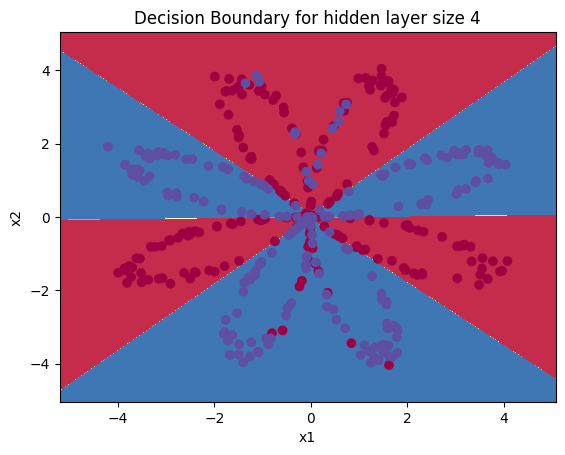

In [23]:
# Build a model with a n_h-dimensional hidden layer
parameters = nn_model(X, Y, 4, 1.2 , num_iterations = 10000, print_cost=True)

# Plot the decision boundary
plot_decision_boundary(lambda x: predict(parameters, x.T), X, Y)
plt.title("Decision Boundary for hidden layer size " + str(4))

In [24]:
# Print accuracy
predictions = predict(parameters, X)

acc = float((np.dot(Y,predictions.T) + np.dot(1-Y,1-predictions.T))/float(Y.size)*100)

assert acc >= 90, "Double check model"

print(f"PASSED! With an accuracy: {acc:.2f}%")

PASSED! With an accuracy: 90.75%


### Tuning hidden layer size

Accuracy for 1 hidden units: 67.5 %
Accuracy for 2 hidden units: 67.25 %
Accuracy for 3 hidden units: 90.75 %
Accuracy for 4 hidden units: 90.5 %
Accuracy for 5 hidden units: 91.25 %
Accuracy for 20 hidden units: 90.5 %


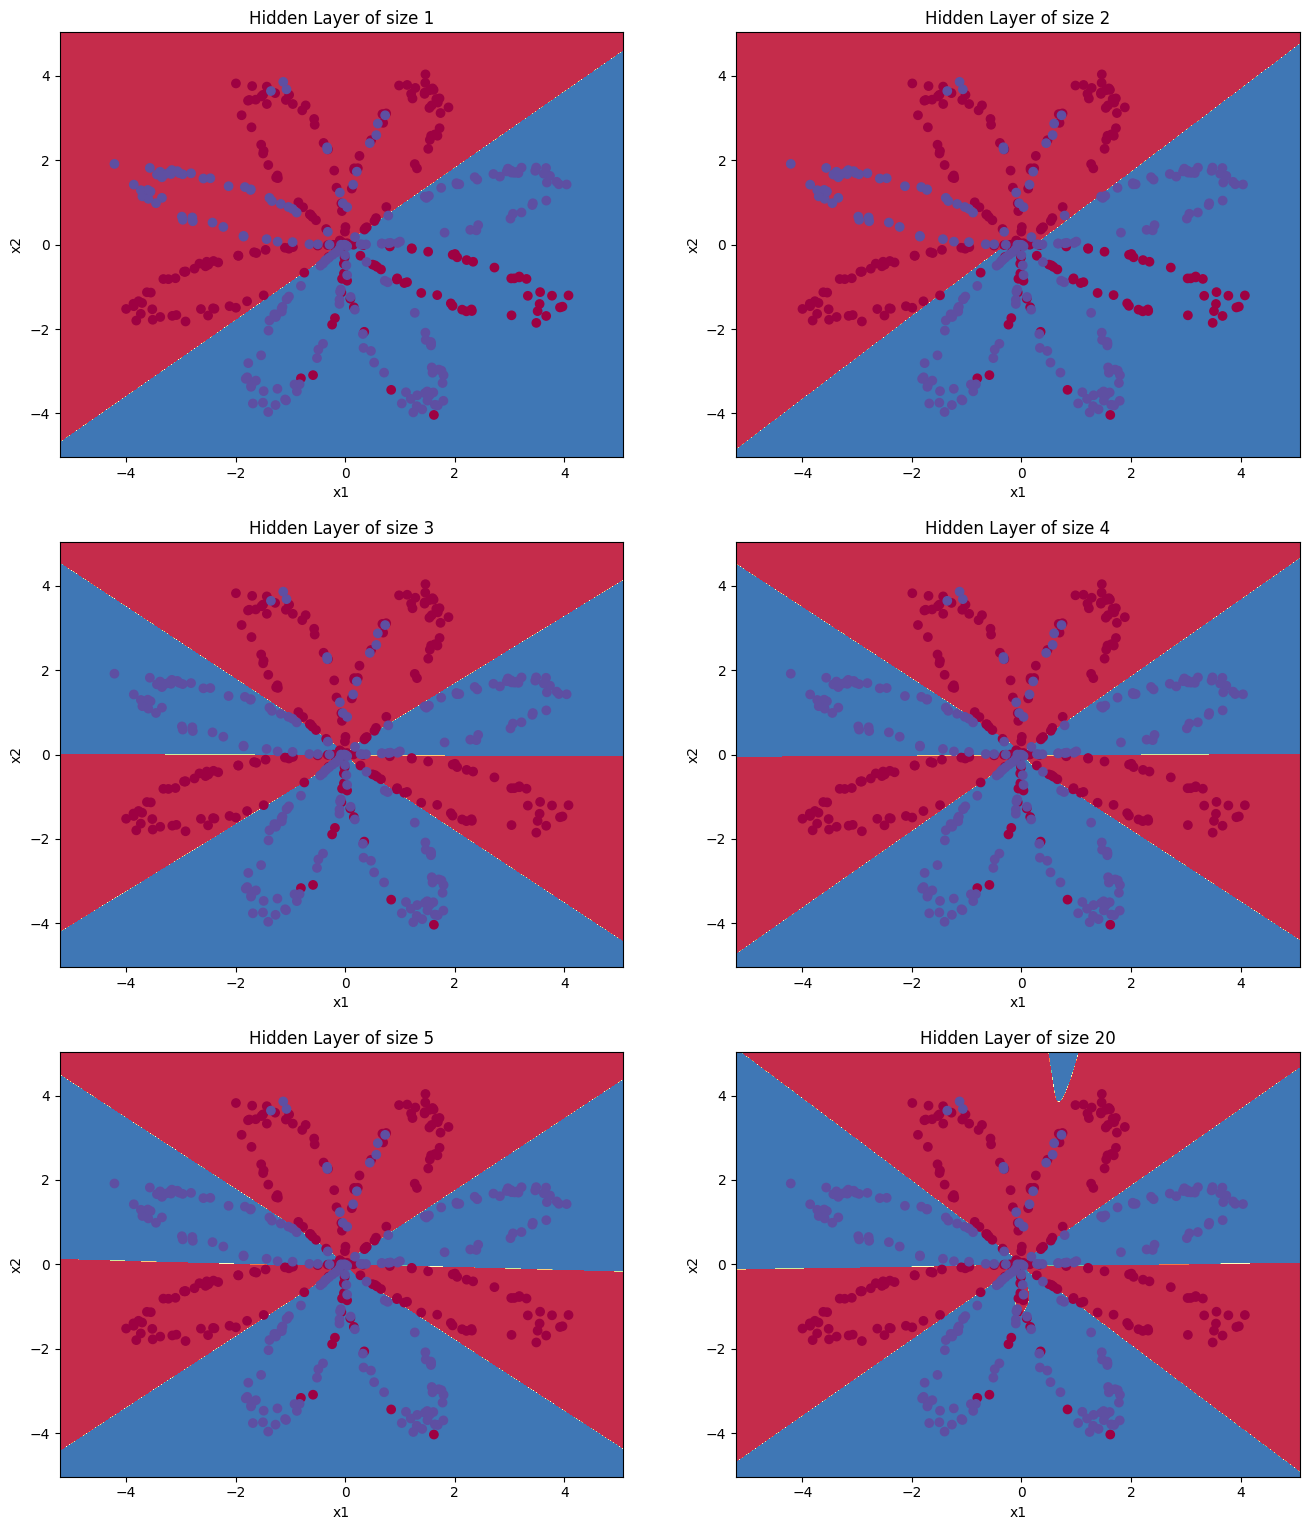

In [25]:
plt.figure(figsize=(16, 32))
hidden_layer_sizes = [1, 2, 3, 4, 5, 20]
for i, n_h in enumerate(hidden_layer_sizes):
    plt.subplot(5, 2, i+1)
    plt.title('Hidden Layer of size %d' % n_h)
    parameters = nn_model(X, Y, n_h,1.2, num_iterations = 5000)
    plot_decision_boundary(lambda x: predict(parameters, x.T), X, Y)
    predictions = predict(parameters, X)
    accuracy = float((np.dot(Y,predictions.T) + np.dot(1-Y,1-predictions.T))/float(Y.size)*100)
    print ("Accuracy for {} hidden units: {} %".format(n_h, accuracy))

# 3 - Change Model into Class